In [ ]:
#imports

import numpy as np
import pandas as pd
from pandas import get_dummies
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation

**Reading date from file**

In [ ]:
df = pd.read_csv("marketing_campaign.csv",sep= '\t')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

**A quick look at the data and it characteristics**

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
missing_values = df.isna().sum().to_dict()
missing_values

{'ID': 0,
 'Year_Birth': 0,
 'Education': 0,
 'Marital_Status': 0,
 'Income': 24,
 'Kidhome': 0,
 'Teenhome': 0,
 'Dt_Customer': 0,
 'Recency': 0,
 'MntWines': 0,
 'MntFruits': 0,
 'MntMeatProducts': 0,
 'MntFishProducts': 0,
 'MntSweetProducts': 0,
 'MntGoldProds': 0,
 'NumDealsPurchases': 0,
 'NumWebPurchases': 0,
 'NumCatalogPurchases': 0,
 'NumStorePurchases': 0,
 'NumWebVisitsMonth': 0,
 'AcceptedCmp3': 0,
 'AcceptedCmp4': 0,
 'AcceptedCmp5': 0,
 'AcceptedCmp1': 0,
 'AcceptedCmp2': 0,
 'Complain': 0,
 'Z_CostContact': 0,
 'Z_Revenue': 0,
 'Response': 0}

#### **There are 24 missing values in 'Income' which we will drop**

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(2216, 29)

#### **Adding and modifying features**

In [ ]:

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print("The latest record on customer's enrollment:", max(df['Dt_Customer']).date())


The latest record on customer's enrollment: 2014-12-06


<ipython-input-9-6942f231c6fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [ ]:
# finding age of the customer from 2015 as the last enrollment of the customer is December 6th 2014 
df['Age'] = 2022 - df['Year_Birth']
#finding unique values for education
df['Education'].unique()

<ipython-input-10-e0e7d9e5c710>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = 2022 - df['Year_Birth']


array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

#### **Narrowing Education down to only 3 categories**

In [ ]:
df['Education'] = df['Education'].replace({'Graduation': 'Graduate', 'PhD': 'Postgraduate', 'Master': 'Postgraduate', '2n Cycle': 'Postgraduate', 'Basic': 'Undergraduate'})

<ipython-input-11-282f16936d3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'] = df['Education'].replace({'Graduation': 'Graduate', 'PhD': 'Postgraduate', 'Master': 'Postgraduate', '2n Cycle': 'Postgraduate', 'Basic': 'Undergraduate'})


In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduate,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduate,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduate,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,55
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,0,1,0,0,3,11,0,76
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,41
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,66


In [ ]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

#### **Narrowing down marital Status from 8 to 2 categories i.e Partner and single**

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace({'Single': 'Single', 'Together': 'Partner','Married': 'Partner', 'Divorced':'Single','Widow':'Single','Alone':'Single','Absurd':'Single','YOLO':'Single'})

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduate,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduate,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduate,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduate,Partner,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,Postgraduate,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Partner,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,55
2236,4001,1946,Postgraduate,Partner,64014.0,2,1,2014-10-06,56,406,...,0,0,0,1,0,0,3,11,0,76
2237,7270,1981,Graduate,Single,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,41
2238,8235,1956,Postgraduate,Partner,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,66


In [ ]:
# Merging Kidhome and Teenhome making it into one Feature of total Children
df['Children'] = df['Kidhome'] + df['Teenhome']
df.drop('Kidhome', axis=1, inplace=True)
df.drop('Teenhome', axis=1, inplace=True)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children
0,5524,1957,Graduate,Single,58138.0,2012-04-09,58,635,88,546,...,0,0,0,0,0,3,11,1,65,0
1,2174,1954,Graduate,Single,46344.0,2014-08-03,38,11,1,6,...,0,0,0,0,0,3,11,0,68,2
2,4141,1965,Graduate,Partner,71613.0,2013-08-21,26,426,49,127,...,0,0,0,0,0,3,11,0,57,0
3,6182,1984,Graduate,Partner,26646.0,2014-10-02,26,11,4,20,...,0,0,0,0,0,3,11,0,38,1
4,5324,1981,Postgraduate,Partner,58293.0,2014-01-19,94,173,43,118,...,0,0,0,0,0,3,11,0,41,1


In [ ]:
df.describe()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,53.179603,0.947202
std,3249.376275,11.985554,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554,0.749062
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,45.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,52.000000,1.000000
75%,8421.750000,1977.000000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,63.000000,1.000000
max,11191.000000,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,129.000000,3.000000


#### **We can observe that Age and Income might have some outliers as their max value is way greater than the upper Quartile**

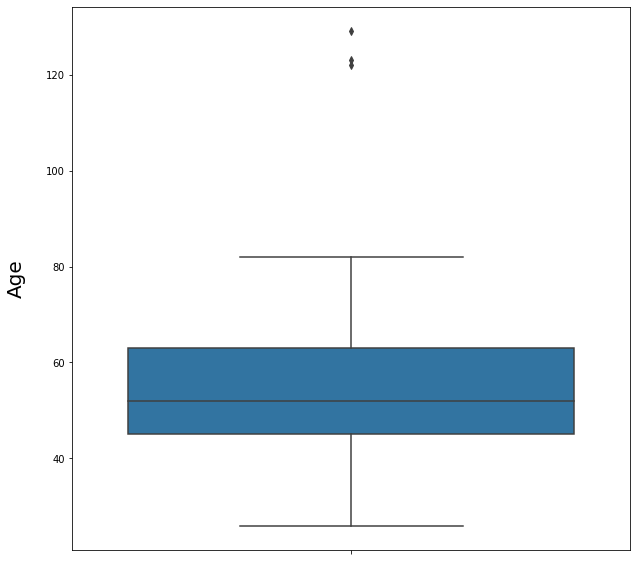

In [ ]:
# Plotting Age
plt.figure(figsize=(10,10))
sns.boxplot(y=df.Age);
plt.ylabel('Age', fontsize=20, labelpad=20);

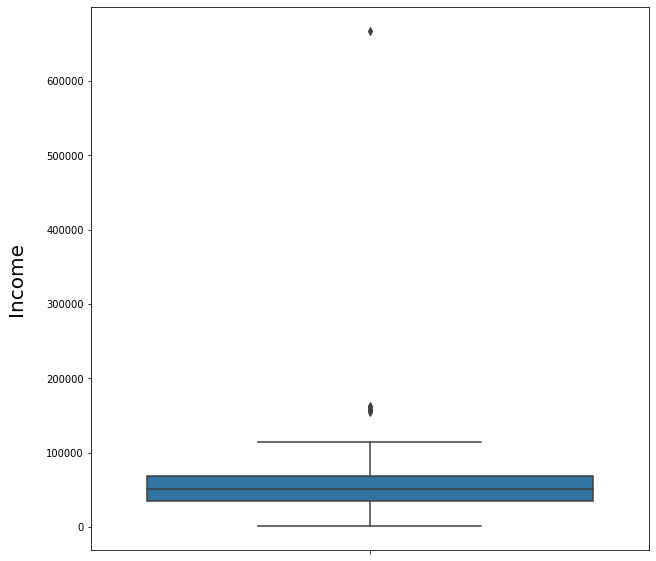

In [ ]:
# Plotting Income
plt.figure(figsize=(10,10))
sns.boxplot(y=df.Income);
plt.ylabel('Income', fontsize=20, labelpad=20);

#### **There are a few Customers whose age is more than 100 and few customers having more than 600000 which can be considered as Outliers.**

In [ ]:
df = df[df.Age<100]
df = df[df.Income<600000]

In [ ]:
df['Marital_Status'] = df['Marital_Status'].astype(str)

for i in df['Marital_Status'].unique():
    print(i, df[df['Marital_Status'] == i].shape[0])

Single 784
Partner 1428


In [ ]:
df['Dt_customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
df['Education'] = df['Education'].astype(str)

for i in df['Education'].unique():
    print(i, df[df['Education'] == i].shape[0])

Graduate 1115
Postgraduate 1043
Undergraduate 54


In [ ]:
def time_based_year(x):
    if x <= pd.to_datetime('2012-12-12'):
        return 'Old Customer'
    elif x <= pd.to_datetime('2013-12-12') and x > pd.to_datetime('2012-12-12'):
        return 'Average Customer'
    else:
        return 'New Customer'

In [ ]:
df['Customer_time_spent'] = df['Dt_Customer'].apply(time_based_year)

In [ ]:
df['Customer_time_spent']

0           Old Customer
1           New Customer
2       Average Customer
3           New Customer
4           New Customer
              ...       
2235    Average Customer
2236        New Customer
2237        New Customer
2238        New Customer
2239        Old Customer
Name: Customer_time_spent, Length: 2212, dtype: object

#### **Exploratry Data Analysis**

<Figure size 576x576 with 0 Axes>

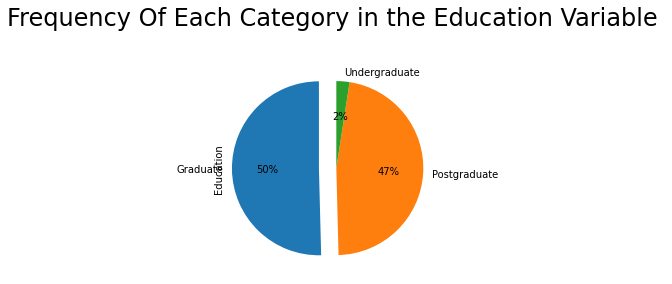

<Figure size 576x576 with 0 Axes>

In [ ]:
myexplode = [0.2, 0, 0]
df['Education'].value_counts().plot(kind='pie',startangle = 90,explode = myexplode, autopct='%.0f%%')
plt.title("Frequency Of Each Category in the Education Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

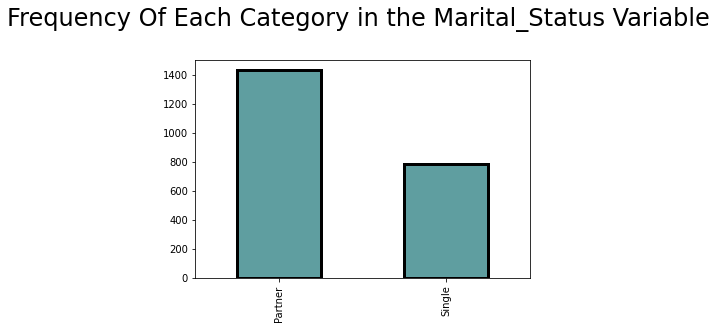

<Figure size 576x576 with 0 Axes>

In [ ]:
df['Marital_Status'].value_counts().plot(kind='bar',color = 'cadetblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Marital_Status Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

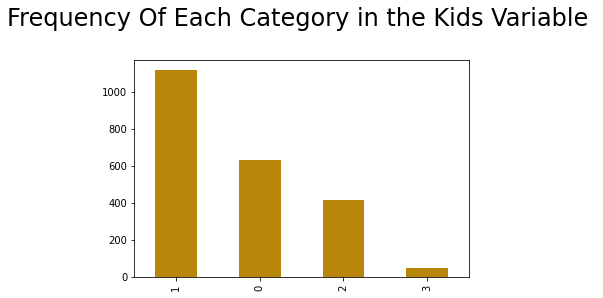

<Figure size 576x576 with 0 Axes>

In [ ]:
df['Children'].value_counts().plot(kind='bar',color='darkgoldenrod')
plt.title("Frequency Of Each Category in the Kids Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

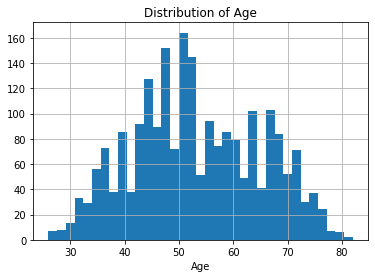

In [ ]:
df.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

In [ ]:
bins= [25,35,45,55,65,75,85]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, right=False)
df['AgeGroup']

0       [65, 75)
1       [65, 75)
2       [55, 65)
3       [35, 45)
4       [35, 45)
          ...   
2235    [55, 65)
2236    [75, 85)
2237    [35, 45)
2238    [65, 75)
2239    [65, 75)
Name: AgeGroup, Length: 2212, dtype: category
Categories (6, interval[int64, left]): [[25, 35) < [35, 45) < [45, 55) < [55, 65) < [65, 75) <
                                        [75, 85)]

**Age group Frequencies**

<Figure size 576x576 with 0 Axes>

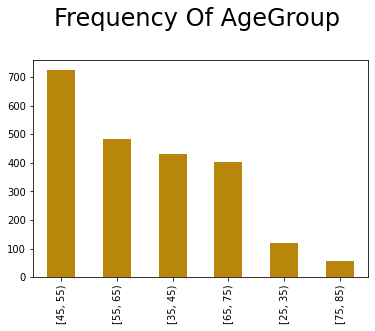

<Figure size 576x576 with 0 Axes>

In [ ]:
df['AgeGroup'].value_counts().plot(kind='bar',color='darkgoldenrod')
plt.title("Frequency Of AgeGroup \n",fontsize=24)
plt.figure(figsize=(8,8))

In [ ]:
col = ['MntWines', 'MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

Amount spend on MntWines according to AgeGroup



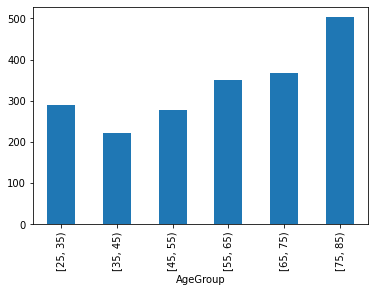

Amount spend on MntFruits according to AgeGroup



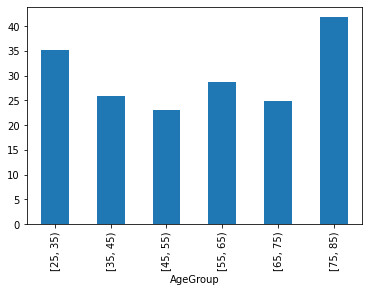

Amount spend on MntMeatProducts according to AgeGroup



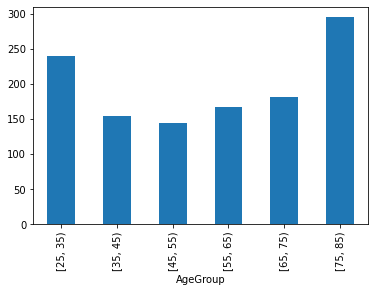

Amount spend on MntFishProducts according to AgeGroup



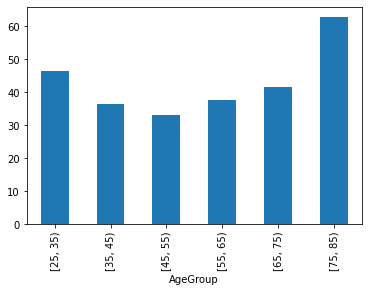

Amount spend on MntSweetProducts according to AgeGroup



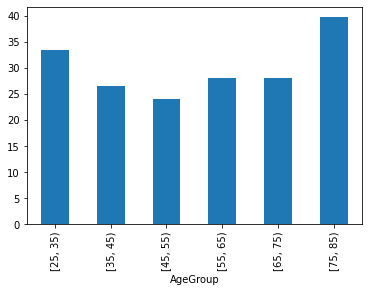

Amount spend on MntGoldProds according to AgeGroup



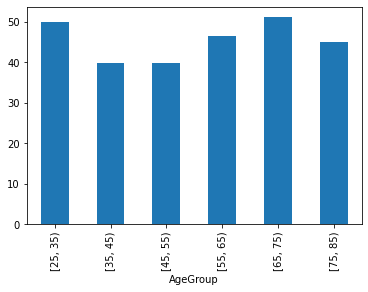

In [ ]:
for i in col:
    table = df.groupby(['AgeGroup'])[i].mean()
    table.plot(kind='bar')
    print("Amount spend on", i, "according to AgeGroup\n")
    
    plt.show()

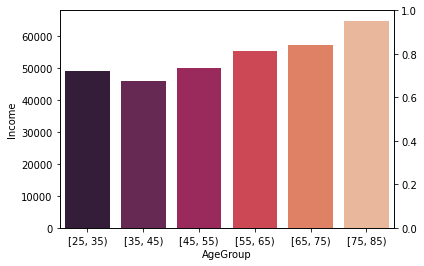

In [ ]:
fig, ax1 = plt.subplots()
sns.barplot(data = df, x = 'AgeGroup', y = 'Income', ci = None,
                      ax = ax1, palette = 'rocket')
ax2 = ax1.twinx()
plt.xlabel('Age Group Ranges')
plt.show()

In [ ]:
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

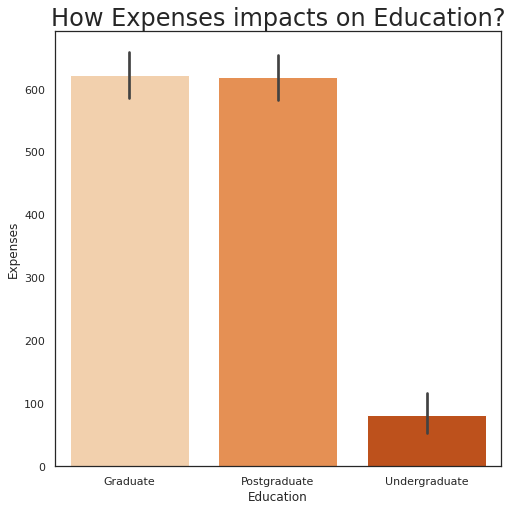

In [ ]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Expenses impacts on Education?",fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=df,palette="Oranges")

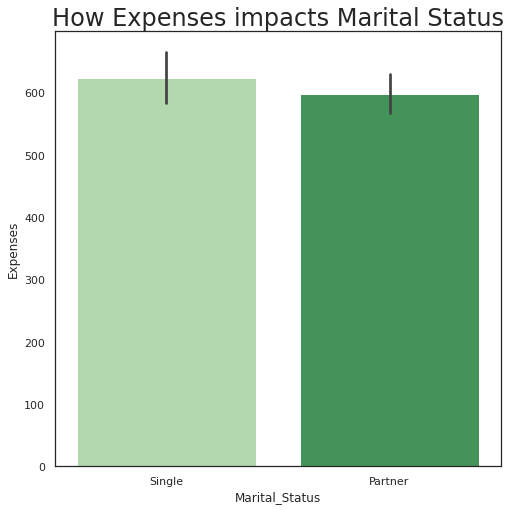

In [ ]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Expenses impacts Marital Status",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Expenses", data=df,palette="Greens")

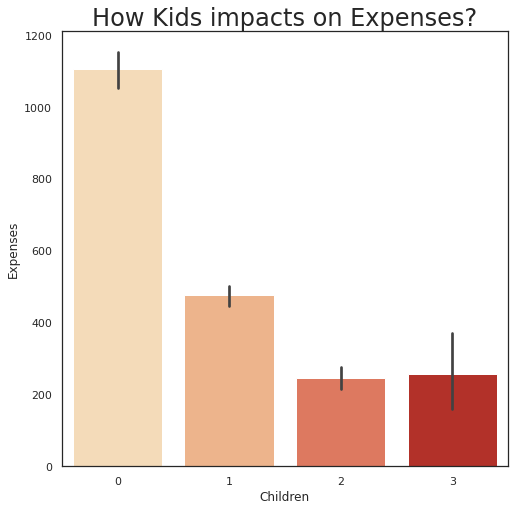

In [ ]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Kids impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Children", y="Expenses", data=df,palette="OrRd")

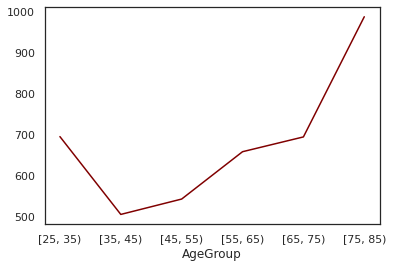

In [ ]:
table_age = df.groupby(['AgeGroup'])['Expenses'].mean()
table_age.plot(kind='line', color= 'maroon')

In [ ]:
#categorical data
categorical_cols = ['Education', 'Marital_Status', 'Customer_time_spent'] 

#import pandas as pd
df_final = pd.get_dummies(df, columns = categorical_cols)

In [ ]:
df_final.head()

,ID,Year_Birth,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AgeGroup,Expenses,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Partner,Marital_Status_Single,Customer_time_spent_Average Customer,Customer_time_spent_New Customer,Customer_time_spent_Old Customer
0,5524,1957,58138.0,2012-04-09,58,635,88,546,172,88,...,"[65, 75)",1617,1,0,0,0,1,0,0,1
1,2174,1954,46344.0,2014-08-03,38,11,1,6,2,1,...,"[65, 75)",27,1,0,0,0,1,0,1,0
2,4141,1965,71613.0,2013-08-21,26,426,49,127,111,21,...,"[55, 65)",776,1,0,0,1,0,1,0,0
3,6182,1984,26646.0,2014-10-02,26,11,4,20,10,3,...,"[35, 45)",53,1,0,0,1,0,0,1,0
4,5324,1981,58293.0,2014-01-19,94,173,43,118,46,27,...,"[35, 45)",422,0,1,0,1,0,0,1,0


In [ ]:
to_drop = ["Z_CostContact", "ID"]
df_final = df_final.drop(to_drop, axis=1)

In [ ]:
df_final.drop('Dt_customer', axis=1, inplace=True)

In [ ]:
scaler = MinMaxScaler()
df_final[['Income', 'Age', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']] = scaler.fit_transform(df_final[['Income', 'Age', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']])

In [ ]:
df_final.drop('Dt_Customer', axis=1, inplace=True)

In [ ]:
df_final.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AgeGroup,Expenses,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Partner,Marital_Status_Single,Customer_time_spent_Average Customer,Customer_time_spent_New Customer,Customer_time_spent_Old Customer
0,1957,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,3,...,"[65, 75)",1617,1,0,0,0,1,0,0,1
1,1954,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,2,...,"[65, 75)",27,1,0,0,0,1,0,1,0
2,1965,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,1,...,"[55, 65)",776,1,0,0,1,0,1,0,0
3,1984,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,2,...,"[35, 45)",53,1,0,0,1,0,0,1,0
4,1981,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,5,...,"[35, 45)",422,0,1,0,1,0,0,1,0
